# Analisar a taxa de conversão da campanha de marketing de um banco
ANÁLISE EXPLORATÓRIA

Fonte - https://archive.ics.uci.edu/ml/datasets/bank+marketing

### dados do cliente do banco:
1. idade (numérica)
2. emprego: tipo de trabalho (categórico: 'admin.', 'Colarinho azul', 'empresário', 'empregada doméstica', 'gerência', 'aposentado', 'autônomo', 'serviços', 'aluno' , 'técnico', 'desempregado', 'desconhecido')
3. conjugal: estado civil (categórica: 'divorciada', 'casada', 'solteira', 'desconhecida'; nota: 'divorciada' significa divorciada ou viúva)
4. educação (categórica: 'básico.4y', 'básico.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')
5. padrão: tem crédito em padrão? (categórico: 'não', 'sim', 'desconhecido')
6. habitação: tem empréstimo à habitação? (categórico: 'não', 'sim', 'desconhecido')
7. empréstimo: tem empréstimo pessoal? (categórico: 'não', 'sim', 'desconhecido')
#### relacionado ao último contato da campanha atual:
8. contato: tipo de comunicação de contato (categórico: 'celular', 'telefone')
9. month: mês do último contato do ano (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: último dia da semana do contato (categórico: 'mon', 'ter', 'qua', 'qui', 'sex')
11. duration: duração do último contato, em segundos (numérico). Nota importante: esse atributo afeta muito o destino de saída (por exemplo, se duration = 0, y = 'no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o final da chamada, y é obviamente conhecido. Portanto, essa entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista.
#### outros atributos:
12. campanha: número de contatos realizados durante esta campanha e para este cliente (numérico, inclui o último contato)
13. pdays: número de dias que passaram depois que o cliente foi contatado pela última vez em uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)
14. anterior: número de contatos realizados antes desta campanha e para este cliente (numérico)
15. resultado: resultado da campanha de marketing anterior (categórica: 'falha', 'inexistente', 'sucesso')
#### atributos de contexto social e econômico
16. emp.var.rate: taxa de variação do emprego - indicador trimestral (numérico)
17. cons.price.idx: índice de preços ao consumidor - indicador mensal (numérico)
18. cons.conf.idx: índice de confiança do consumidor - indicador mensal (numérico)
19. euribor3m: taxa euribor a 3 meses - indicador diário (numérico) - Taxa Interbancária do Euro. As taxas da Euribor baseiam-se nas taxas de juros médias nas quais um grande painel de bancos europeus empresta fundos uns dos outros
20. nº empregado: número de empregados - indicador trimestral (numérico)

Variável de saída (destino desejado):
21. y - o cliente assinou um depósito a prazo? (binário: 'sim', 'não')


\

In [28]:
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/bank-additional-full.csv"
bank = pd.read_csv(file_name, sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print ("Rows     : " , bank.shape[0])
print ("Columns  : " , bank.shape[1])
print ("\nFeatures : \n" ,bank.columns.tolist())
print ("\nMissing values :  ", bank.isnull().sum().values.sum())
print ("\nUnique values :  \n", bank.nunique())

Rows     :  41188
Columns  :  21

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Missing values :   0

Unique values :  
 age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [29]:
bank['converted'] = bank['y'].apply(lambda c:1  if c == 'yes' else 0)

In [6]:
bank = bank.drop(['y'], axis = 1)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,converted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Alguns dados

In [7]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,converted
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
converted         41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [9]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,converted
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


No handles with labels found to put in legend.


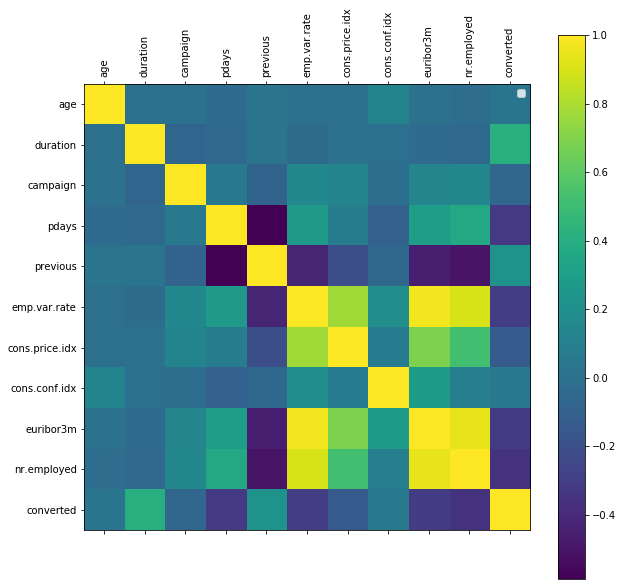

In [11]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
plot_corr(bank)

In [12]:
print('Total Converted: %i out of %i' % (bank.converted.sum(), len(bank)))
print('Our Conversion Rate: %0.2f%%' % (bank.converted.sum() / len(bank) * 100.0))

Total Converted: 4640 out of 41188
Our Conversion Rate: 11.27%


Número de convertidos por campanha

In [13]:
pd.DataFrame(bank.groupby(by='campaign')['converted'].sum())

,converted
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


Numero todal de clientes atingidos na campanha

In [14]:
pd.DataFrame(bank.groupby(by='campaign')['converted'].count())

,converted
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


Taxa de conversão para cada campanha

In [15]:
conv_by_camp = bank.groupby('campaign')['converted'].sum() / bank.groupby('campaign')['converted'].count() * 100.0
conv_by_camp.head(10)

campaign
1     13.037071
2     11.456954
3     10.747051
4      9.392682
5      7.504690
6      7.660878
7      6.041335
8      4.250000
9      6.007067
10     5.333333
Name: converted, dtype: float64

In [16]:
converted_sums_camp = bank.groupby(['campaign', 'converted']).agg({'converted': 'count'})
conv_by_camp2 = converted_sums_camp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
conv_by_camp2

converted
campaign converted            
1        0           86.962929
         1           13.037071
2        0           88.543046
         1           11.456954
3        0           89.252949
         1           10.747051
4        0           90.607318
         1            9.392682
5        0           92.495310
         1            7.504690
6        0           92.339122
         1            7.660878
7        0           93.958665
         1            6.041335
8        0           95.750000
         1            4.250000
9        0           93.992933
         1            6.007067
10       0           94.666667
         1            5.333333
11       0           93.220339
         1            6.779661
12       0           97.600000
         1            2.400000
13       0           95.652174
         1            4.347826
14       0           98.550725
         1            1.449275
15       0           96.078431
         1            3.921569
16       0          100.000000
17       0           93.103448
         1            6.896552
18       0          100.000000
19       0          100.000000
20       0          100.000000
21       0          100.000000
22       0          100.000000
23       0           93.750000
         1            6.250000
24       0          100.000000
25       0          100.000000
26       0          100.000000
27       0          100.000000
28       0          100.000000
29       0          100.000000
30       0          100.000000
31       0          100.000000
32       0          100.000000
33       0          100.000000
34       0          100.000000
35       0          100.000000
37       0          100.000000
39       0          100.000000
40       0          100.000000
41       0          100.000000
42       0          100.000000
43       0          100.000000
56       0          100.000000

Conversões por idade.

In [17]:
converted_sums_age = bank.groupby(['age', 'converted']).agg({'converted': 'count'})
conv_by_age = converted_sums_age.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
conv_by_age

converted
age converted            
17  0           60.000000
    1           40.000000
18  0           57.142857
    1           42.857143
19  0           52.380952
    1           47.619048
20  0           64.615385
    1           35.384615
21  0           71.568627
    1           28.431373
22  0           73.722628
    1           26.277372
23  0           78.761062
    1           21.238938
24  0           81.425486
    1           18.574514
25  0           84.448161
    1           15.551839
26  0           82.521490
    1           17.478510
27  0           86.603995
    1           13.396005
28  0           84.915085
    1           15.084915
29  0           87.198899
    1           12.801101
30  0           88.214702
    1           11.785298
31  0           88.700565
    1           11.299435
...                   ...
77  0           35.000000
    1           65.000000
78  0           48.148148
    1           51.851852
79  0           50.000000
    1           50.000000
80  0           41.935484
    1           58.064516
81  0           60.000000
    1           40.000000
82  0           35.294118
    1           64.705882
83  0           52.941176
    1           47.058824
84  0           57.142857
    1           42.857143
85  0           53.333333
    1           46.666667
86  0           37.500000
    1           62.500000
87  1          100.000000
88  0           59.090909
    1           40.909091
89  1          100.000000
91  0          100.000000
92  0           25.000000
    1           75.000000
94  0          100.000000
95  0          100.000000
98  1          100.000000

[150 rows x 1 columns]

In [18]:
# Isolate it to percentages for more efficient viewing
conv_by_age = bank.groupby('age')['converted'].sum() / bank.groupby('age')['converted'].count() * 100.0
#conv_by_age = pd.DataFrame(conv_by_age)
conv_by_age = pd.DataFrame(conv_by_age).reset_index()
conv_by_age

,age,converted
0,17,40.000000
1,18,42.857143
2,19,47.619048
3,20,35.384615
4,21,28.431373
5,22,26.277372
6,23,21.238938
7,24,18.574514
8,25,15.551839
9,26,17.478510


Mostrando as idades com maior taxa de conversão por ordem decrescente

In [19]:
conv_by_age.sort_values('converted', ascending=False)

,age,converted
77,98,100.000000
72,89,100.000000
70,87,100.000000
74,92,75.000000
60,77,65.000000
65,82,64.705882
69,86,62.500000
63,80,58.064516
59,76,52.941176
48,65,52.272727


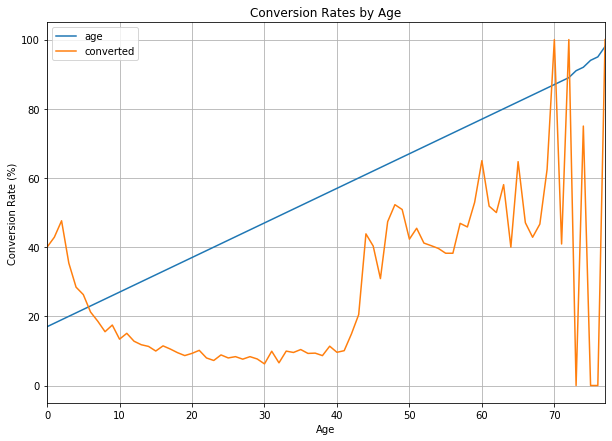

In [20]:
import matplotlib.pyplot as plt

ax = conv_by_age.plot(grid=True, figsize=(10, 7), title='Conversion Rates by Age')

ax.set_xlabel('Age')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

Criando um grupo de idades

In [21]:
bank['age_group'] = bank['age'].apply(lambda x: '[17, 25)' if x < 25 else '[25, 35)' 
                                  if x < 35 else '[35, 45)'
                                  if x < 45 else '[45, 55)' 
                                  if x < 55 else '[55, 65)'
                                  if x < 65 else '65+')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,converted,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[55, 65)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[55, 65)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[35, 45)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[35, 45)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"[55, 65)"


In [22]:
pd.DataFrame(bank.groupby('age_group')['converted'].sum())

,converted
age_group,
65+,313
"[17, 25)",256
"[25, 35)",1666
"[35, 45)",1168
"[45, 55)",753
"[55, 65)",484


In [23]:
pd.DataFrame(bank.groupby('age_group')['converted'].count())

,converted
age_group,
65+,663
"[17, 25)",1068
"[25, 35)",13686
"[35, 45)",13500
"[45, 55)",8704
"[55, 65)",3567


In [24]:
conv_by_age_group = bank.groupby('age_group')['converted'].sum() / bank.groupby('age_group')['converted'].count() * 100.0
conv_by_age_group.head()

age_group
65+         47.209653
[17, 25)    23.970037
[25, 35)    12.173024
[35, 45)     8.651852
[45, 55)     8.651195
Name: converted, dtype: float64

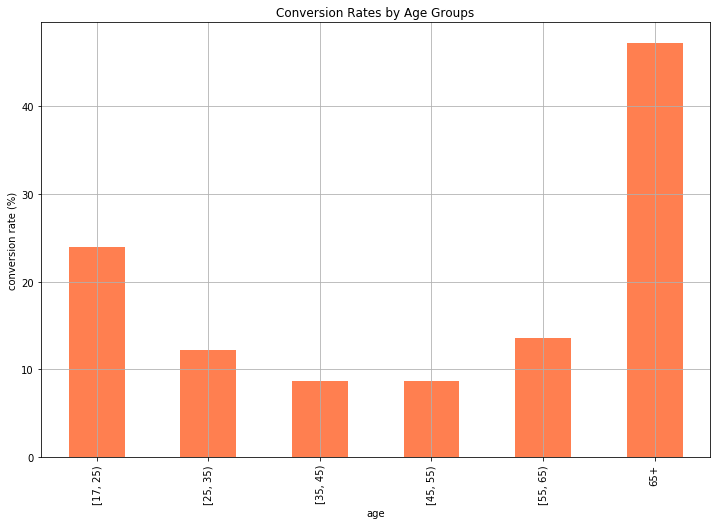

In [25]:
ax = conv_by_age_group.loc[['[17, 25)', '[25, 35)', '[35, 45)', '[45, 55)', '[55, 65)', '65+']].plot(
    kind='bar',
    color='coral',
    grid=True,
    figsize=(12, 8),
    title='Conversion Rates by Age Groups')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

In [32]:
conversions_by_education = pd.pivot_table(bank, values='y', index='education', columns='converted', aggfunc=len)
conversions_by_education

converted,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [34]:
conversions_by_education.columns = ['non_conversions', 'conversions']
conversions_by_education

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


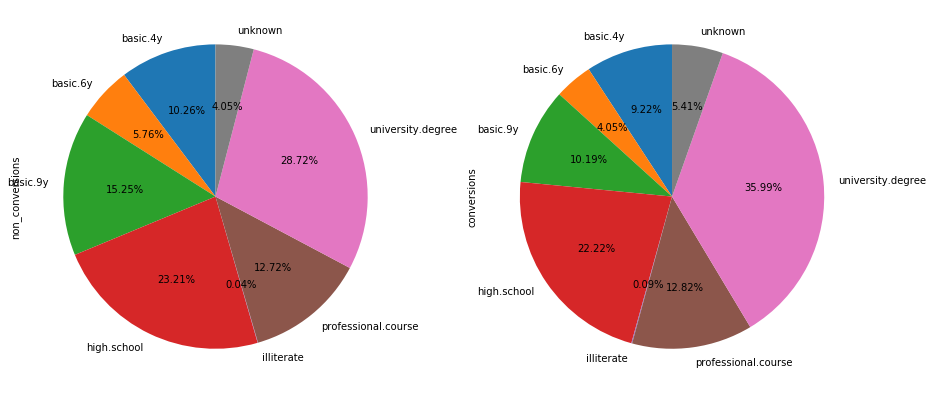

In [35]:
conversions_by_education.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.2f%%' % x,
    legend=False
)

plt.show()

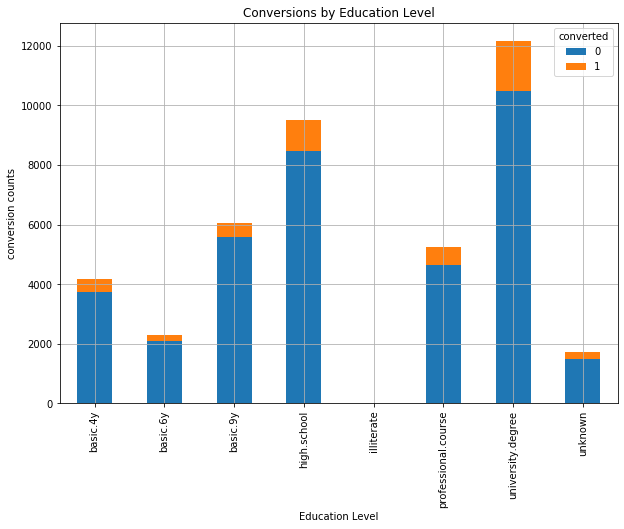

In [33]:
ax = conversions_by_education.loc[['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
 'university.degree','unknown']].plot(
    kind='bar', 
    grid=True,
    stacked=True,
    figsize=(10,7))

ax.set_title('Conversions by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('conversion counts')

plt.show()

In [36]:
conversions_by_education['per_converted'] = conversions_by_education['conversions'] / conversions_by_education['non_conversions']
conversions_by_education

,non_conversions,conversions,per_converted
education,,,
basic.4y,3748,428,0.114194
basic.6y,2104,188,0.089354
basic.9y,5572,473,0.084889
high.school,8484,1031,0.121523
illiterate,14,4,0.285714
professional.course,4648,595,0.128012
university.degree,10498,1670,0.159078
unknown,1480,251,0.169595


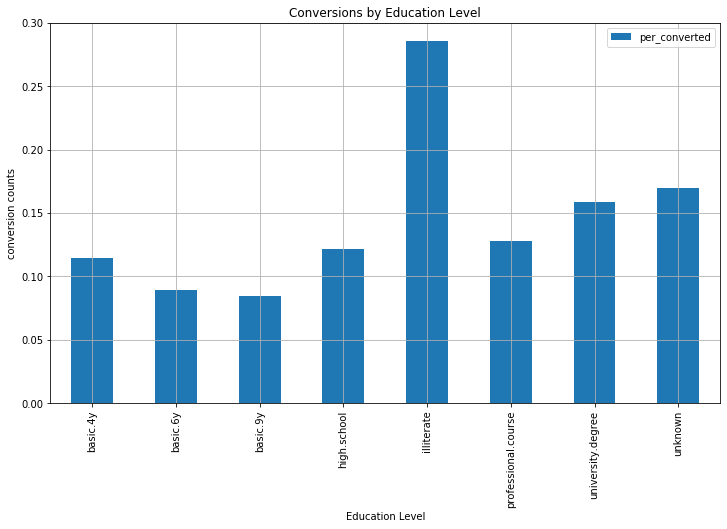

In [37]:
ax = conversions_by_education.loc[['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course',
 'university.degree','unknown']].plot(
    y = 'per_converted',
    kind='bar', 
    grid=True,
    stacked=True,
    figsize=(12,7))

ax.set_title('Conversions by Education Level')
ax.set_xlabel('Education Level')
ax.set_ylabel('conversion counts')

plt.show()

In [38]:
conv_rate_by_job = bank.groupby('job')['converted'].sum() / bank.groupby('job')['converted'].count() * 100.0
conv_rate_by_job

job
admin.           12.972558
blue-collar       6.894316
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.232558
self-employed    10.485574
services          8.138070
student          31.428571
technician       10.826042
unemployed       14.201183
unknown          11.212121
Name: converted, dtype: float64

In [39]:
conv_rate_by_job = conv_rate_by_job.sort_values()
conv_rate_by_job

job
blue-collar       6.894316
services          8.138070
entrepreneur      8.516484
housemaid        10.000000
self-employed    10.485574
technician       10.826042
unknown          11.212121
management       11.217510
admin.           12.972558
unemployed       14.201183
retired          25.232558
student          31.428571
Name: converted, dtype: float64

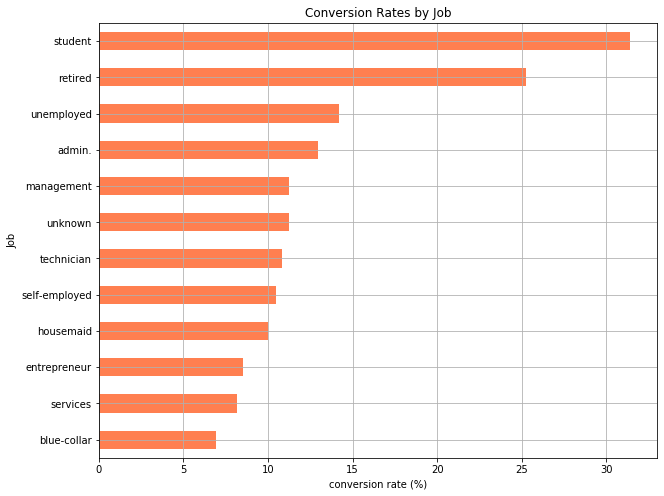

In [40]:
ax = conv_rate_by_job.plot(
    kind='barh',
    color='coral',
    grid=True,
    figsize=(10, 8),
    title='Conversion Rates by Job')

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')

plt.show()

In [41]:
conv_rate_by_ms = bank.groupby('marital')['converted'].sum() / bank.groupby('marital')['converted'].count() * 100.0
conv_rate_by_ms = conv_rate_by_ms.sort_values()
conv_rate_by_ms

marital
married     10.157253
divorced    10.320902
single      14.004149
unknown     15.000000
Name: converted, dtype: float64

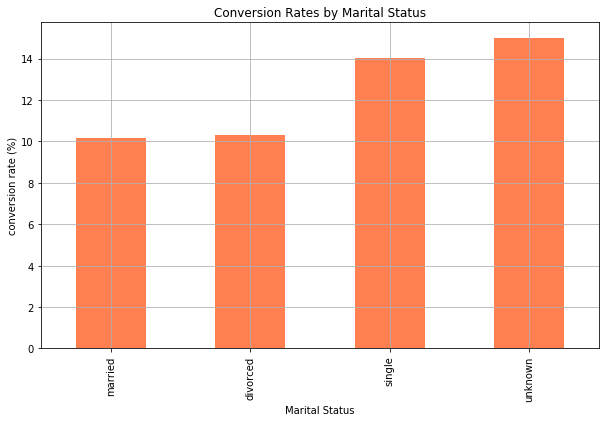

In [42]:
ax = conv_rate_by_ms.plot(
    kind='bar',
    color='coral',
    grid=True,
    figsize=(10, 6),
    title='Conversion Rates by Marital Status')

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()